In [1]:
# goal: extract relevant information regarding the topic 'love'
# the data used are the top 100 billboard-chart-lyrics from 1964-2015

In [2]:
import pandas as pd

In [3]:
import os

In [4]:
# list files in current directory

os.listdir()

['.git',
 '.ipynb_checkpoints',
 'billboard_lyrics_1964-2015.csv',
 'lovewords.ipynb']

In [5]:
# import data from csv

data = pd.read_csv('billboard_lyrics_1964-2015.csv', encoding='latin-1')

In [6]:
# show data structure

data.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 6 columns):
Rank      5100 non-null int64
Song      5100 non-null object
Artist    5100 non-null object
Year      5100 non-null int64
Lyrics    4913 non-null object
Source    4913 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 239.1+ KB


In [8]:
word_counts = {}

# loop over the 'Lyrics' column
for lyric in data['Lyrics'].values:
    lyric_string = str(lyric)
    
    # split lyrics by using space as separator
    words = lyric_string.split(' ')
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

In [9]:
# we sort the words by count
# use an anonymous function (lambda expression) to use the first element of every value pair as sorting key
word_counts_sorted = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)


# show 'top 20'
print(word_counts_sorted[:20])

[('you', 64606), ('i', 56466), ('the', 53451), ('to', 35752), ('and', 32555), ('me', 31170), ('a', 29282), ('it', 25688), ('my', 22821), ('in', 18553), ('that', 16151), ('on', 15814), ('your', 15459), ('love', 15283), ('im', 14278), ('be', 13004), ('of', 12825), ('', 12266), ('all', 11895), ('dont', 11587)]


In [10]:
# make a list of all words and get the index of 'love'

words = []
for word, count in word_counts_sorted:
    words.append(word)

# shorthand syntax (list comprehension)
words = [word for word, count in word_counts_sorted]


love_rank = 1 + words.index('love')
print(love_rank)

14


In [11]:
# first conclusion:
# 'love' is 14th place in word_counts
# 'love' is the first actual noun, besides words required to form sentencens ('you', 'i')
# therefore: 'love' is the most important topic

In [12]:
# grouping words by song

word_counts = {}
for i, lyric in enumerate(data['Lyrics'].values):
    lyric_string = str(lyric)
    words = lyric_string.split(' ')
    word_counts[i] = {}
    for word in words:
        song = word_counts[i]
        if word in song:
            song[word] += 1
        else:
            song[word] = 1

In [13]:
# use collections module to order entries in the dictionary for no reason

import collections

word_counts_sorted = collections.OrderedDict(word_counts)

In [14]:
# verify count

num_songs = len(word_counts_sorted)
print(num_songs)

5100


In [15]:
# filtering all the songs containing 'love'

love_songs = []
for i, song in word_counts_sorted.items():
    if 'love' in song.keys():
        love_songs.append(i)

num_love_songs = len(love_songs)
print(num_love_songs)

2723


In [16]:
# ratio of love

print(num_love_songs / num_songs)

0.533921568627451


In [17]:
# counting only 'love'

love_count = 0
for i in love_songs:
    for word, count in word_counts_sorted[i].items():
        if word == 'love':
            love_count += count
print(love_count)

15283


In [18]:
# save love songs in new DataFrame

only_love = data.iloc[love_songs]

In [19]:
only_love.head()

,Rank,Song,Artist,Year,Lyrics,Source
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0
7,8,cant you hear my heart beat,hermans hermits,1965,carterlewis every time i see you lookin my way...,5.0
12,13,the birds and the bees,jewel akens,1965,let me tell ya bout the birds and the bees and...,3.0
13,14,hold me thrill me kiss me,mel carter,1965,hold me hold me never let me go until youve t...,1.0


In [20]:
# count love songs in every year

love_count = 0
love_time = {}
for index, song in only_love.iterrows():
    year, lyrics = song['Year'], song['Lyrics']
    if year in love_time:
        love_time[year] += 1
    else:
        love_time[year] = 1
print(love_time)

{1965: 49, 1966: 46, 1967: 54, 1968: 42, 1969: 49, 1970: 50, 1971: 45, 1972: 45, 1973: 40, 1974: 45, 1975: 52, 1976: 51, 1977: 58, 1978: 58, 1979: 62, 1980: 50, 1981: 49, 1982: 56, 1983: 52, 1984: 50, 1985: 54, 1986: 53, 1987: 57, 1988: 68, 1989: 67, 1990: 63, 1991: 62, 1992: 61, 1993: 61, 1994: 58, 1995: 62, 1996: 52, 1997: 49, 1998: 59, 1999: 52, 2000: 61, 2001: 63, 2002: 58, 2003: 57, 2004: 47, 2005: 50, 2006: 43, 2007: 48, 2008: 55, 2009: 47, 2010: 56, 2011: 51, 2012: 45, 2013: 55, 2014: 51, 2015: 55}


In [21]:
# import matplotlib to display the number of love songs over time

import matplotlib.pyplot as plt

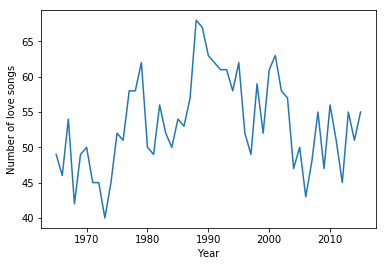

In [22]:
x = love_time.keys()
y = love_time.values()
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Number of love songs')
plt.show()

In [23]:
# different way to get there
# using more variables, allows further information to be extracted

love_count = 0
love_time_lyrics = {}
for index, song in only_love.iterrows():
    year, rank, lyrics = song['Year'], song['Rank'], song['Lyrics']
    if year not in love_time_lyrics:
        love_time_lyrics[year] = {}
    
    lyrics_string = str(lyrics)
    words = lyrics_string.split(' ')
    love_time_lyrics[year][rank] = {}
    
    for word in words:
        song = love_time_lyrics[year][rank]
        if word in song:
            song[word] += 1
        else:
            song[word] = 1

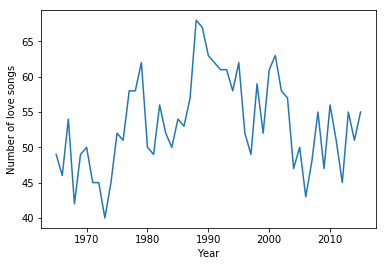

In [24]:
x = love_time_lyrics.keys()
y = [len(year) for year in love_time_lyrics.values()]
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Number of love songs')
plt.show()

In [25]:
# adding another graph
# extracting the average love count per song

y2 = []
for year in love_time_lyrics.values():
    love_sum = 0
    for song in year.values():
        love_sum += song['love']
    y2.append(love_sum / len(year.values()))

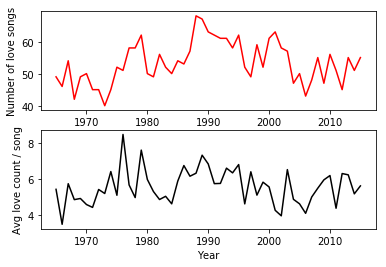

In [26]:
plt.figure()
plt.subplot(211)
plt.plot(x, y, 'r')
plt.ylabel('Number of love songs')
plt.subplot(212)
plt.plot(x, y2, 'k')
plt.ylabel('Avg love count / song')
plt.xlabel('Year')
plt.show()

In [27]:
# find max value

max_avg_love = max(y2)

# get index of max value

max_avg_love_ix = y2.index(max_avg_love)

# get corresponding year (base year + index)

max_avg_love_year = 1965 + max_avg_love_ix
print(max_avg_love_year)

1976


In [28]:
# finding the song with most 'love' in 1976

songs_1976 = love_time_lyrics[1976]
love_count_rank = [(rank, song['love']) for rank, song in songs_1976.items()]
max_love_song = max(love_count_rank, key=lambda x: x[1])
rank, love_count = max_love_song
print('Most love 1976: {} (rank {})'.format(love_count, rank))

Most love 1976: 54 (rank 41)


In [29]:
# the average love count per song is highest in 1976
# but is there a song with even more love? spoiler: yes

max_love_songs = []
for year in love_time_lyrics.values():
    max_love_song = max([song['love'] for song in year.values()])
    max_love_songs.append(max_love_song)
print('Most love ever: ', max(max_love_songs))

Most love ever:  56


In [30]:
# second conclusion: data is deceiving
# (or i'm just asking it the wrong questions)